# An Initial Inspection of the Data

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import random
%matplotlib inline
import matplotlib.pyplot as plt
from altair import *

In [2]:
given = pickle.load(open("cleanedData.pkl", "rb"))
audio_analysis = pickle.load(open("audio_analysis_df.pkl", "rb"))
key_analysis = pickle.load(open("key_analysis_df.pkl", "rb"))
lengths_df = pickle.load(open("lengths_df.pkl", "rb"))

In [3]:
songs = pd.concat([given, audio_analysis, key_analysis, lengths_df], axis=1)

In [4]:
songs.head()

,artist,genre,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,...,cluster,Gender,duration_avg,loudness_end_avg,loudness_max_avg,loudness_max_time_avg,loudness_start_avg,key_changes,num_sections,num_segments
0,Nat King Cole,jazz,"Mona Lisa, Mona Lisa, men have named you\nYou'...",189.0,0.199,1950,5.2,88.74,145,17,...,String Lover,male,0.347113,-60.00,-17.186855,0.083278,-22.742452,1,6,598
1,Nat King Cole,jazz,They try to tell us we're too young\nToo young...,100.8,0.133,1951,4.8,106.67,92,13,...,String Lover,male,0.359395,-60.00,-17.411563,0.099854,-26.226034,8,9,551
2,Nat King Cole,jazz,Pretend you're happy when you're blue\nIt isn'...,119.7,0.222,1953,4.4,99.23,99,15,...,String Lover,male,0.348728,-59.68,-17.758643,0.076399,-24.168794,4,9,524
3,Nat King Cole,jazz,"Answer me, oh, my love\nJust what sin have I b...",190.8,0.292,1954,4.4,99.23,158,25,...,String Lover,male,0.383495,-60.00,-14.676978,0.084908,-25.330629,2,7,412
4,Nat King Cole,jazz,A blossom fell from off a tree\nIt settled sof...,157.5,0.280,1955,4.0,100.24,132,24,...,String Lover,male,0.271985,-60.00,-13.451605,0.076851,-23.094671,5,12,702


**Putting genre into condensed categories, for some analysis.**

In [5]:
df = songs[~songs.genre.isnull()]
df["general_genres"] = df["genre"].map({
    "jazz": "jazz/swing",
    "swing": "jazz/swing",
    "rock": "rock/blues",
    "blues": "rock/blues",
    "soul": "soul/rnb/pop/hiphop",
    "rnb": "soul/rnb/pop/hiphop",
    "folk":"folk",
    "country":"country",
    "disco" : "disco",
    'electronic/dance':'electronic/dance',
    "pop":"soul/rnb/pop/hiphop",
    "hip-hop":"soul/rnb/pop/hiphop",
    'alternative/indie':'alternative',
    'reggae':'reggae'
})

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


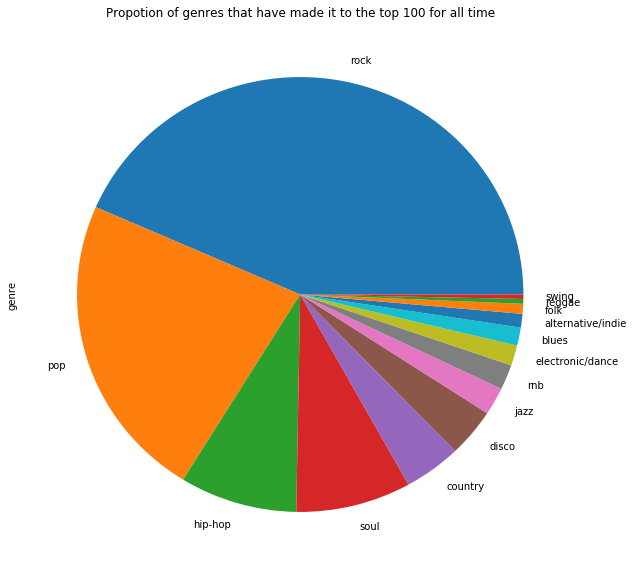

In [9]:
songs.genre.value_counts().plot.pie(figsize=(10,10),
                                    title="Propotion of genres that have made it to the top 100 for all time")

**From this pie chart, we can see that almost half the songs that made it to the top 100 over the past 65 years have been rock songs. Then approximately 25% of the songs that made it to the top 100 were pop songs.**

In [7]:
year_index = ["50s", "60s", "70s", "80s", "90s", "00s", "10s"]

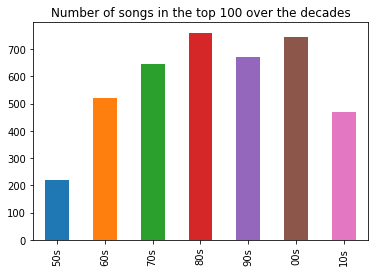

In [8]:
(songs.year_bin.value_counts()
 .reindex(year_index)
 .plot
 .bar(title="Number of songs in the top 100 over the decades"))

**The reason there might be a huge contrast is because the number of songs that made it to the hot 100 per decade consisted of many more songs in later decades than earlier ones. The songs that are in the hot 100 are always changing, and it may be that it changes more often nowadays. A smart thing to check is how many songs for each genre were a top 100 song, per decade. The reason the 10s are fairly low is because we only go up to 2015, so this is only half of the decade.**

In [10]:
colors = ["red", "orange", "yellow", "green", "blue", "purple", "gray", "violet", "black", "pink","cyan", "brown" ]

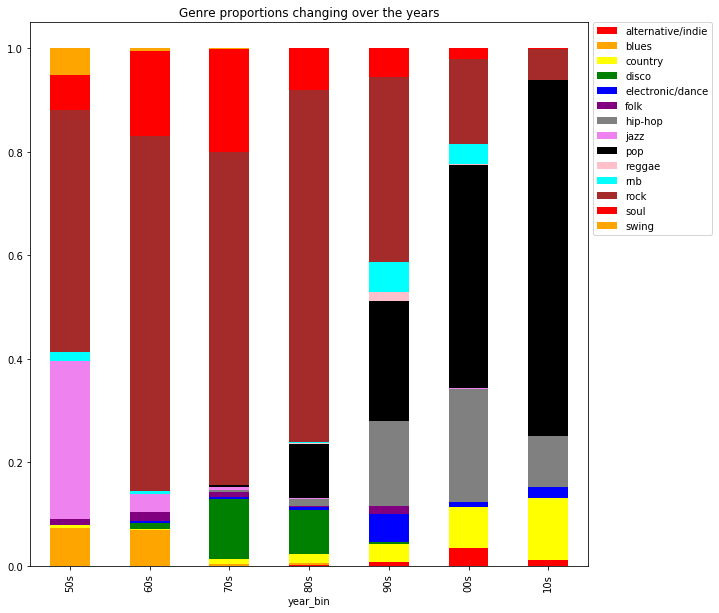

In [11]:
counts = pd.crosstab(songs.year_bin, songs.genre).reindex(year_index)
genre_given_year = counts.divide(counts.sum(axis=1), axis=0)
(genre_given_year.plot.bar(stacked=True,
                           figsize=(10,10),
                           color=colors,
                          title = "Genre proportions changing over the years")
 .legend(bbox_to_anchor=(1.0, 1.01)))

**This stacked bar chart shows how the popularity has changed over the years. We can see that rock (dark red) has had a lot of popularity over the years and peeked in popularity in the 80s. As rock has begun to die down, pop (black) has started to take its place and become more popular.**

**The following pie charts show the proportion of how often a rock or pop song would make it to the top 100 throughout the decades.**

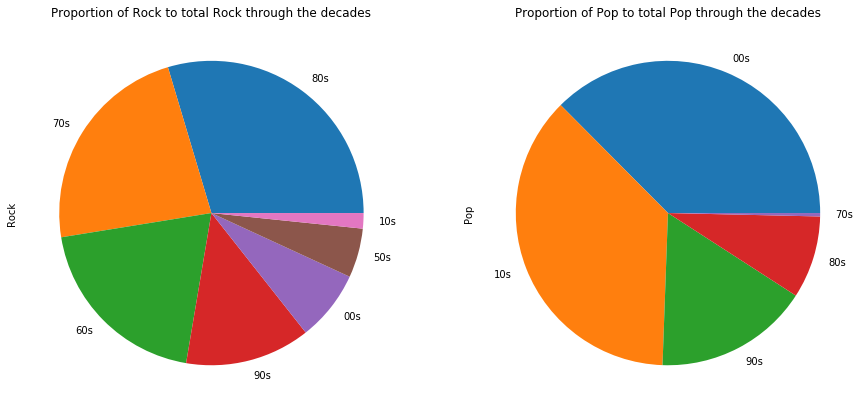

In [14]:
f = plt.figure(figsize=(15,7))
ax = f.add_subplot(121)
songs[songs.genre == "rock"].year_bin.value_counts().plot.pie(label="Rock",
                                        title="Proportion of Rock to total Rock through the decades")
ax2 = f.add_subplot(122)
songs[songs.genre == "pop"].year_bin.value_counts().plot.pie(label="Pop",
                                        title="Proportion of Pop to total Pop through the decades")


**If we want to see how less popular genres were distributed through out the years, the following bar chart displays how disco, hip-hop, jazz and swing vary by decade.**

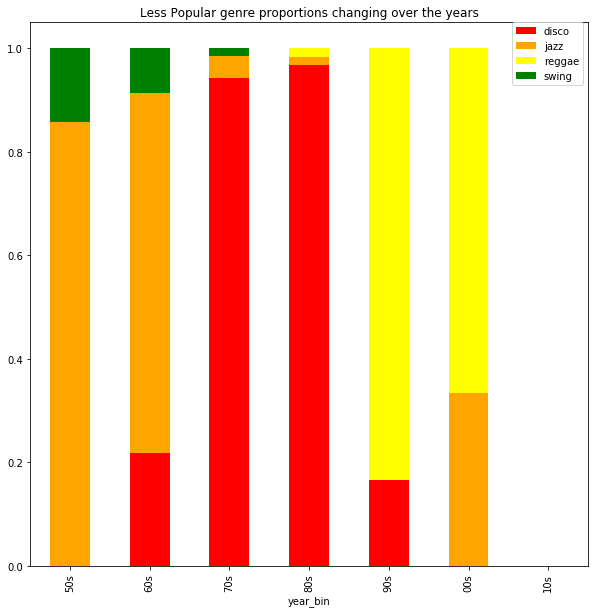

In [15]:
less_popular = songs[songs.genre.isin(["jazz", "disco", "reggae", "swing"])]
counts = pd.crosstab(less_popular.year_bin, less_popular.genre).reindex(year_index)
genre_given_year = counts.divide(counts.sum(axis=1), axis=0)
(genre_given_year
 .plot
 .bar(stacked=True,
      figsize=(10,10),
      color=colors,
      title="Less Popular genre proportions changing over the years")
 .legend(bbox_to_anchor=(1.0, 1.01)))

**From the visualizations above it is clear that the popularity of a genre changes over the years. Next we will take a look at how the genres change based on some of the quantitative variables, including those we have made.**

**It is interesting to see here how all these genres were each popular for a couple of decades (except swing) and then all died in the 2010s. (Graph Above)**

**The flesch-kincaid grade (`f_k_grade`) level is used to measure how difficult the language is to understand. Each ranking corresponds to a U.S. grade level. So for example, a ranking of 5 represents that the lyrics are of a fifth grade reading level.**

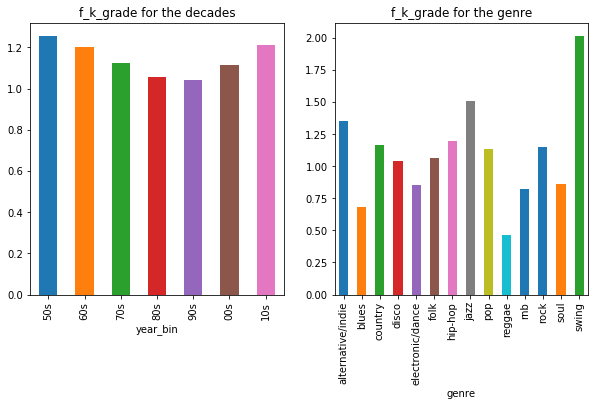

In [16]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
(songs.groupby("year_bin")
 .f_k_grade.mean()
 .reindex(year_index)
 .plot
 .bar(title="f_k_grade for the decades"))
ax2 = f.add_subplot(122)
(songs.groupby("genre")
 .f_k_grade.mean()
 .plot
 .bar(title="f_k_grade for the genre"))

**Through the years we can see that the flesch-kincaid grade is fairly uniform. However, through the genres, the average flesch-kincaid grade variation is more apparent.**

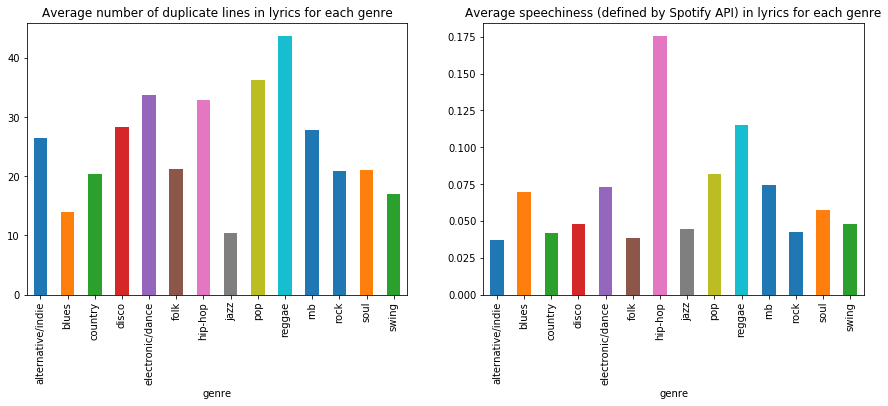

In [23]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
songs.groupby("genre").num_dupes.mean().plot.bar(
                                    title = "Average number of duplicate lines in lyrics for each genre")
ax2 = f.add_subplot(122)
songs.groupby("genre").speechiness.mean().plot.bar(
                                    title = "Average speechiness (defined by Spotify API) in lyrics for each genre")

**Through out the genres, the number of repeated lines in the lyrics varies quite a bit. This would be a great feature in a machine learning model. Not only this, but the speechiness varies a lot as well.**

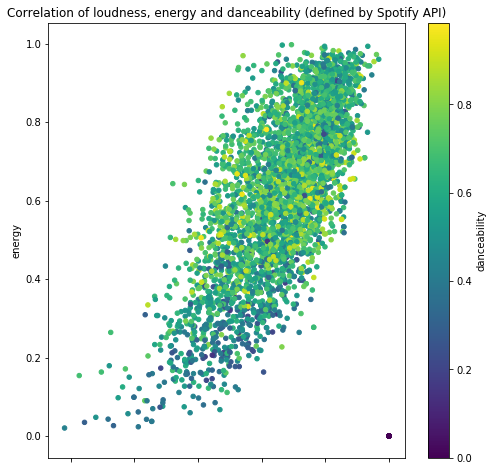

In [26]:
songs.plot.scatter(x="loudness",
                   y="energy",
                   c="danceability",
                   cmap="viridis",
                   figsize=(8,8),
                  title = "Correlation of loudness, energy and danceability (defined by Spotify API)")

In [27]:
songs[["danceability", "energy", "loudness"]].corr()

,danceability,energy,loudness
danceability,1.000000,0.319800,0.046779
energy,0.319800,1.000000,0.605792
loudness,0.046779,0.605792,1.000000


**Among the three variables, `danceability`, `energy`, and `loudness`, we can see that they are all positively correlated to eachother. Note, although `danceability` is correlated, it is loosely correlated. This begs the question, does this correlation also extend to the genres and in what ways?**

In [ ]:
"""Chart(df).mark_circle().encode(
    x="loudness",
    y="energy",
    color=Color("danceability"),
    column=Column("general_genres")
)"""

**These are scatter plots of the above scatter plot, but separated by the genre.**

![](alt1.png)

![](alt2.png)

![](alt3.png)

![](alt4.png)

**Now that we know that quantitative variables are related, let's take a look at how genres can be similar or different based on these variables.**

genre
jazz    AxesSubplot(0.547727,0.125;0.352273x0.755)
pop     AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: danceability, dtype: object

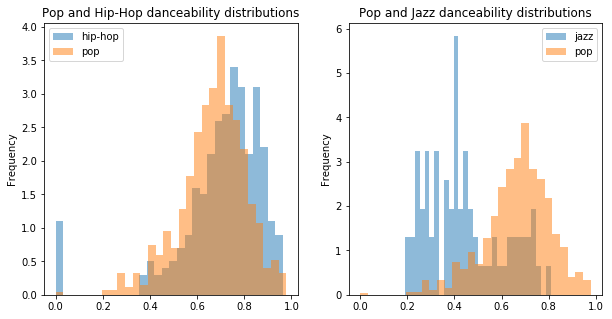

In [31]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
(songs[songs.genre.isin(["pop", "hip-hop"])]
 .groupby("genre")
 .danceability
 .plot
 .hist(alpha=0.5, legend=True, density=True, bins=30,
      title = "Pop and Hip-Hop danceability distributions"))
ax2 = f.add_subplot(122)
(songs[songs.genre.isin(["pop", "jazz"])]
 .groupby("genre")
 .danceability
 .plot
 .hist(alpha=0.5, legend=True, density=True, bins=30,
      title = "Pop and Jazz danceability distributions"))


**Pop and hip-hop can sound very related when we listen to them on the radio. However, pop and jazz may not be as related. We can see that the distributions for danceability look fairly similar for pop and hip-hop, but look completely different between pop and jazz. Does this idea hold for other quantitative measures?**

genre
jazz    AxesSubplot(0.547727,0.125;0.352273x0.755)
pop     AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: key_changes, dtype: object

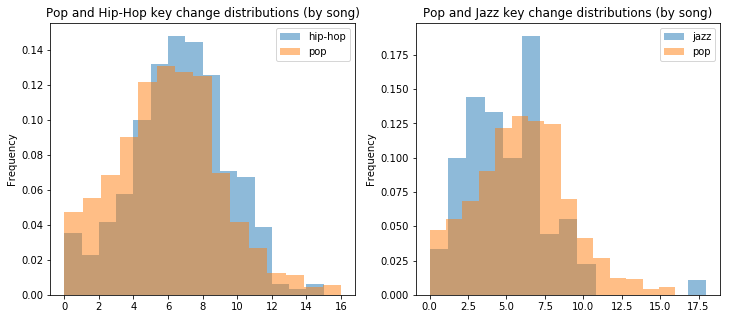

In [34]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
(songs[songs.genre.isin(["pop", "hip-hop"])]
 .groupby("genre")
 .key_changes
 .plot
 .hist(alpha=0.5, legend=True, density=True, bins=15,
      title = "Pop and Hip-Hop key change distributions (by song)"))
ax2 = f.add_subplot(122)
(songs[songs.genre.isin(["pop", "jazz"])]
 .groupby("genre")
 .key_changes
 .plot
 .hist(alpha=0.5, legend=True, density=True, bins=15,
      title = "Pop and Jazz key change distributions (by song)"))

**As we can see, similar genres such as pop and hip-hop have a fairly equal distribtion of key changes across all songs. On the other hand the distributions of very differet genres such as pop and jazz may not look so similar. Although the difference is apparent, it is very slight. Therefore, this feature may not be useful in a machine learning model that predicts the genre of a song.**

genre
jazz    AxesSubplot(0.547727,0.125;0.352273x0.755)
pop     AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: acousticness, dtype: object

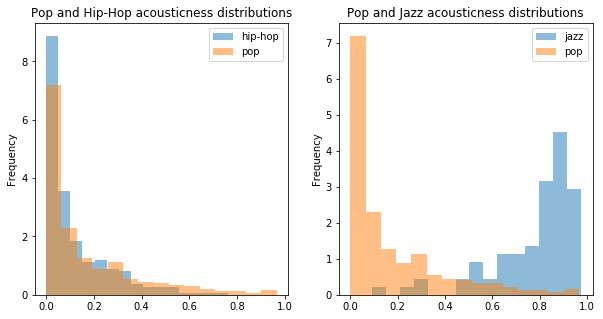

In [36]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
(songs[songs.genre.isin(["pop", "hip-hop"])]
 .groupby("genre")
 .acousticness
 .plot
 .hist(alpha=0.5, legend=True, density=True, bins=15,
      title = "Pop and Hip-Hop acousticness distributions"))
ax2 = f.add_subplot(122)
(songs[songs.genre.isin(["pop", "jazz"])]
 .groupby("genre")
 .acousticness
 .plot
 .hist(alpha=0.5, legend=True, density=True, bins=15,
      title = "Pop and Jazz acousticness distributions"))

**To really drive this point home, we can see that the acousticness distribution really looks similar for hip-hop and pop, but pop and jazz are true complements of eachother.**

**This means we should use some of these variables as features in a machine learning model to help determine the genre of different songs.**

**Although similar genres such as pop and hip-hop seem to have the same distributions for quantitative measures, these genres are still not the same. So there must be quantitative measures that make them different.**

genre
hip-hop    AxesSubplot(0.125,0.125;0.775x0.755)
pop        AxesSubplot(0.125,0.125;0.775x0.755)
Name: difficult_words, dtype: object

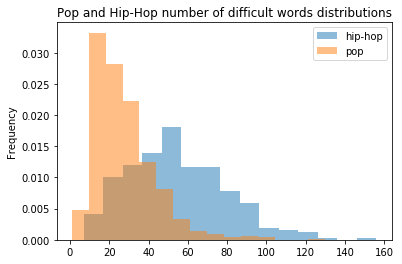

In [40]:
(songs[songs.genre.isin(["pop", "hip-hop"])]
 .groupby("genre")
 .difficult_words
 .plot
 .hist(alpha=0.5, legend=True, density=True, bins=15,
      title = "Pop and Hip-Hop number of difficult words distributions"))

**Here we can see that the distribution of difficult words for pop and hip-hop are not really the same, whereas the distribution for acousticness on these genres are the same.**

**The following is a way to see the measures across all the genres**

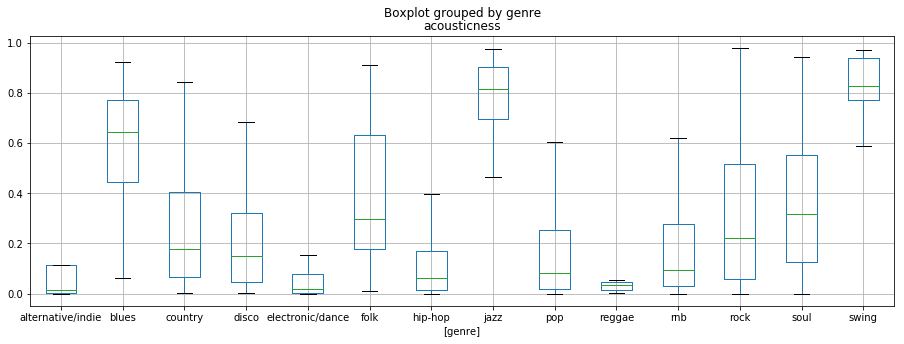

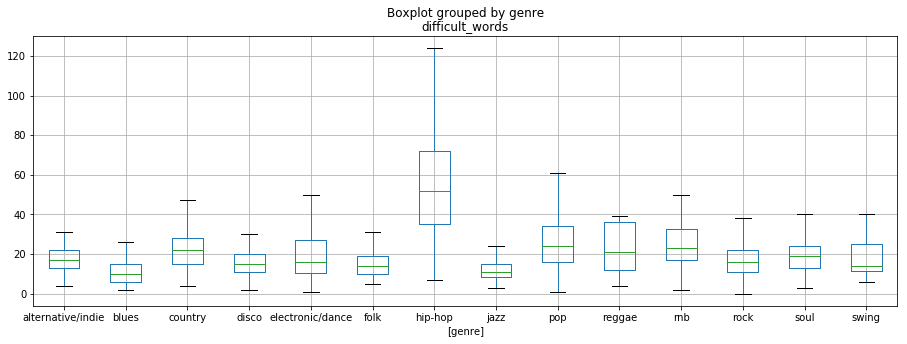

In [41]:
#f = plt.figure(figsize=(15,5))
#ax = f.add_subplot(211)
songs[["acousticness", "genre"]].boxplot(by="genre", figsize=(15,5), showfliers=False)
#ax2 = f.add_subplot(212)
songs[["difficult_words", "genre"]].boxplot(by="genre", figsize=(15,5), showfliers=False)

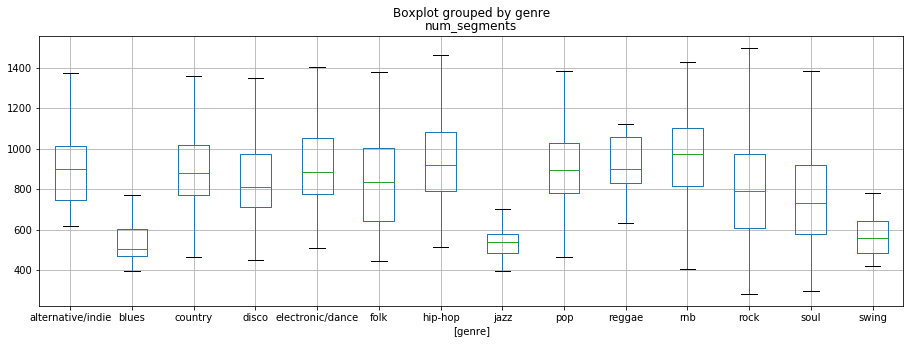

In [42]:
songs[["num_segments", "genre"]].boxplot(by="genre", figsize=(15, 5), showfliers=False)

**For the different genres, it is not really appropriate to just look at one quantitative measure to decifer what the genre is. Instead it is important to look at combinations of different variables to decide what song applies to which genre.**

**Below we are reducing the dimensionality of our data so we can try to see more variance among the genres at once. We do this using PCA, and reduce our dimensionality to two or three components.**

In [49]:
from sklearn.preprocessing import StandardScaler
features = ['num_words', 'num_lines',
       'num_dupes', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 
            'year_bin', 'duration_avg', 'loudness_end_avg', 'loudness_max_avg',
       'loudness_max_time_avg', 'loudness_start_avg', 'key_changes',
       'num_sections', 'num_segments']
DF = songs[songs.genre.isin(["pop", "jazz", "rock"])]
X_train = DF[features]
X_train = pd.get_dummies(X_train)

In [50]:
from sklearn.preprocessing import StandardScaler
features = X_train.columns
# Separating out the features
x = X_train.loc[:, features].values
# Separating out the target
y = DF.loc[:,['genre']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [52]:
finalDf = principalDf

In [53]:
finalDf["genre"] = y

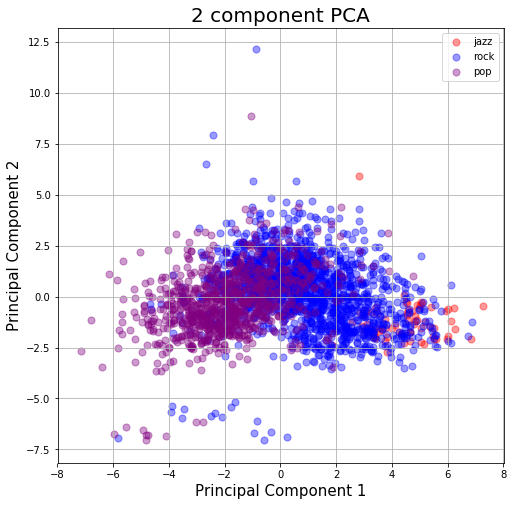

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(finalDf.genre.unique())
colors = ["red", "blue", "purple", "green"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha=0.4)
ax.legend(targets)
ax.grid()

**Here we can see how different Pop and Jazz are from each other while rock merges with both pop and jazz.**

In [55]:
from sklearn.preprocessing import StandardScaler
features = ['num_words', 'num_lines',
       'num_dupes', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'duration_avg', 'loudness_end_avg', 'loudness_max_avg',
       'loudness_max_time_avg', 'loudness_start_avg', 'key_changes',
       'num_sections', 'num_segments', "year_bin"]
DF = songs[songs.genre.isin(["pop", "hip-hop"])]
X_train = DF[features]
X_train = pd.get_dummies(X_train)

In [56]:
from sklearn.preprocessing import StandardScaler
features = X_train.columns
# Separating out the features
x = X_train.loc[:, features].values
# Separating out the target
y = DF.loc[:,['genre']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [58]:
finalDf = principalDf

In [59]:
finalDf["genre"] = y

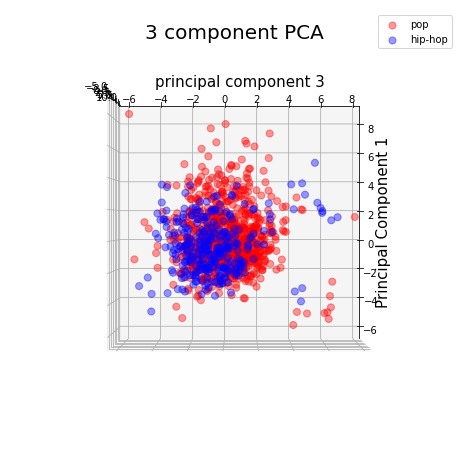

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('principal component 3', fontsize=15)
ax.set_title('3 component PCA', fontsize = 20)
targets = list(finalDf.genre.unique())
colors = ["red", "blue", "purple", "green"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50
              , alpha=0.4)
ax.legend(targets)
ax.grid()
ax.azim = 0
ax.elev = -90

plt.show()

**We can also see that pop and hip-hop are on very similar scales. Therefore, it will be difficult to distinguish between the two.**

**What if the lyrics are what make the pop and hip-hop genres different?**

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

features = ['num_words', 'num_lines',
       'num_dupes', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'duration_avg', 'loudness_end_avg', 'loudness_max_avg',
       'loudness_max_time_avg', 'loudness_start_avg', 'key_changes',
       'num_sections', 'num_segments', "year_bin", "lyrics", "genre"]
data = songs[features].dropna()
data = data[data.genre.isin(["pop", "hip-hop"])]
lyrics = data["lyrics"].replace("\n", " ")
vector = TfidfVectorizer(norm=None, min_df = 0.02, stop_words={"english"}, lowercase=True) # Do not normalize.
vector.fit(lyrics) # This determines the vocabulary.
tf_idf_sparse = vector.transform(lyrics)
lyrics = pd.DataFrame(tf_idf_sparse.todense())
lyrics.columns = vector.vocabulary_

In [62]:
years = data.year_bin.reset_index().drop("index", axis=1)

In [63]:
X_feats = pd.concat([lyrics, years], axis=1, sort=False)
X_feats = pd.get_dummies(X_feats)

In [64]:
feats = X_feats.columns
# Separating out the features
x = X_feats.loc[:, feats].values
# Separating out the target
y = data.loc[:,['genre']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [65]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [66]:
finalDf = principalDf
finalDf["genre"] = y

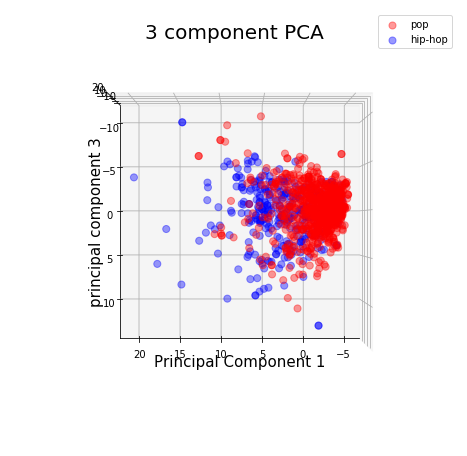

In [67]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('principal component 3', fontsize=15)
ax.set_title('3 component PCA', fontsize = 20)
targets = list(finalDf.genre.unique())
colors = ["red", "blue", "purple", "green"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50
              , alpha=0.4)
ax.legend(targets)
ax.grid()
ax.azim = 90
ax.elev = -270

plt.show()

**From this prinicipal component analysis, we can see that pop and hip-hop are still very closely related to eachother and that their lyrics are fairly similar.**